<a href="https://colab.research.google.com/github/singhmegh/Credit_Card_Dashboard/blob/main/Myntra_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
products = pd.read_excel("Myntra dataset.xlsx", sheet_name = "dim_products")
products

,Product ID,Category,Sub-category,Product Name,Brand Name,Size,Color,Ratings
0,P0001,Women,Topwear,T-Shirts,Roadster,40,Black,4
1,P0002,Women,Topwear,T-Shirts,Roadster,40,Blue,5
2,P0003,Women,Topwear,T-Shirts,Roadster,42,White,3
3,P0004,Women,Topwear,T-Shirts,Roadster,44,Green,2
4,P0005,Women,Topwear,T-Shirts,Puma,38,Olive,5
...,...,...,...,...,...,...,...,...
3066,P3067,Kids,Footwear,Sandals,Campus,9-12M,Olive,5
3067,P3068,Kids,Footwear,Sandals,Campus,9-12M,Teal,3
3068,P3069,Kids,Footwear,Sandals,Campus,3-6M,Sea Green,5
3069,P3070,Kids,Footwear,Sandals,Campus,3-6M,Turquoise Blue,5


In [8]:
customers = pd.read_excel("Myntra dataset.xlsx", sheet_name = "dim_customers")
customers

,Customer ID,Customer Age,City,State
0,C001,30,Mumbai,Maharashtra
1,C002,35,Mumbai,Maharashtra
2,C003,36,Mumbai,Maharashtra
3,C004,40,Pune,Maharashtra
4,C005,25,Pune,Maharashtra
...,...,...,...,...
95,C096,36,Jodhpur,Rajasthan
96,C097,37,Jodhpur,Rajasthan
97,C098,38,Udaipur,Rajasthan
98,C099,39,Udaipur,Rajasthan


In [9]:
orders = pd.read_excel("Myntra dataset.xlsx", sheet_name = "fact_orders")
orders

,Order ID,Customer ID,Product ID,Date,Original Price,Discount%
0,OD0001,C001,P0001,2021-05-20,349,0.30
1,OD0002,C002,P0001,2021-01-19,350,0.30
2,OD0003,C003,P0001,2021-10-28,351,0.30
3,OD0004,C004,P0001,2021-05-20,352,0.25
4,OD0005,C005,P0001,2022-11-08,353,0.25
...,...,...,...,...,...,...
3495,OD3496,C081,P3071,2023-01-01,685,0.50
3496,OD3497,C082,P3071,2022-07-08,707,0.50
3497,OD3498,C083,P3071,2021-02-06,1819,0.50
3498,OD3499,C084,P3071,2021-07-18,856,0.50


In [11]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500 entries, 0 to 3499
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Order ID        3500 non-null   object        
 1   Customer ID     3500 non-null   object        
 2   Product ID      3500 non-null   object        
 3   Date            3500 non-null   datetime64[ns]
 4   Original Price  3500 non-null   int64         
 5   Discount%       3500 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 164.2+ KB


In [12]:
orders.describe()

,Date,Original Price,Discount%
count,3500,3500.000000,3500.000000
mean,2022-02-15 04:32:46.628571392,843.840000,0.355146
min,2021-01-01 00:00:00,123.000000,0.100000
25%,2021-07-23 00:00:00,456.000000,0.300000
50%,2022-02-19 00:00:00,634.000000,0.350000
75%,2022-09-06 00:00:00,1119.000000,0.420000
max,2023-03-31 00:00:00,22365.000000,0.550000
std,NaN,689.706016,0.100804


In [14]:
products.duplicated().sum()
customers.duplicated().sum()
orders.duplicated().sum()

0

In [15]:
products.drop_duplicates()

,Order ID,Customer ID,Product ID,Date,Original Price,Discount%
0,OD0001,C001,P0001,2021-05-20,349,0.30
1,OD0002,C002,P0001,2021-01-19,350,0.30
2,OD0003,C003,P0001,2021-10-28,351,0.30
3,OD0004,C004,P0001,2021-05-20,352,0.25
4,OD0005,C005,P0001,2022-11-08,353,0.25
...,...,...,...,...,...,...
3495,OD3496,C081,P3071,2023-01-01,685,0.50
3496,OD3497,C082,P3071,2022-07-08,707,0.50
3497,OD3498,C083,P3071,2021-02-06,1819,0.50
3498,OD3499,C084,P3071,2021-07-18,856,0.50


In [18]:
orders["Month"] = orders["Date"].dt.strftime("%B")
orders

,Order ID,Customer ID,Product ID,Date,Original Price,Discount%,Month
0,OD0001,C001,P0001,2021-05-20,349,0.30,May
1,OD0002,C002,P0001,2021-01-19,350,0.30,January
2,OD0003,C003,P0001,2021-10-28,351,0.30,October
3,OD0004,C004,P0001,2021-05-20,352,0.25,May
4,OD0005,C005,P0001,2022-11-08,353,0.25,November
...,...,...,...,...,...,...,...
3495,OD3496,C081,P3071,2023-01-01,685,0.50,January
3496,OD3497,C082,P3071,2022-07-08,707,0.50,July
3497,OD3498,C083,P3071,2021-02-06,1819,0.50,February
3498,OD3499,C084,P3071,2021-07-18,856,0.50,July


In [36]:
orders["Total Price"] = orders["Original Price"] - (orders["Original Price"] * orders["Discount%"])
orders

,Order ID,Customer ID,Product ID,Date,Original Price,Discount%,Month,Total Price
0,OD0001,C001,P0001,2021-05-20,349,0.30,May,244.30
1,OD0002,C002,P0001,2021-01-19,350,0.30,January,245.00
2,OD0003,C003,P0001,2021-10-28,351,0.30,October,245.70
3,OD0004,C004,P0001,2021-05-20,352,0.25,May,264.00
4,OD0005,C005,P0001,2022-11-08,353,0.25,November,264.75
...,...,...,...,...,...,...,...,...
3495,OD3496,C081,P3071,2023-01-01,685,0.50,January,342.50
3496,OD3497,C082,P3071,2022-07-08,707,0.50,July,353.50
3497,OD3498,C083,P3071,2021-02-06,1819,0.50,February,909.50
3498,OD3499,C084,P3071,2021-07-18,856,0.50,July,428.00


In [37]:
gb = orders.groupby("Month").agg({"Total Price":"sum"})
gb

,Total Price
Month,
April,123333.24
August,151195.18
December,149565.59
February,202941.95
January,232189.61
July,137832.60
June,140366.13
March,211853.22
May,156812.99


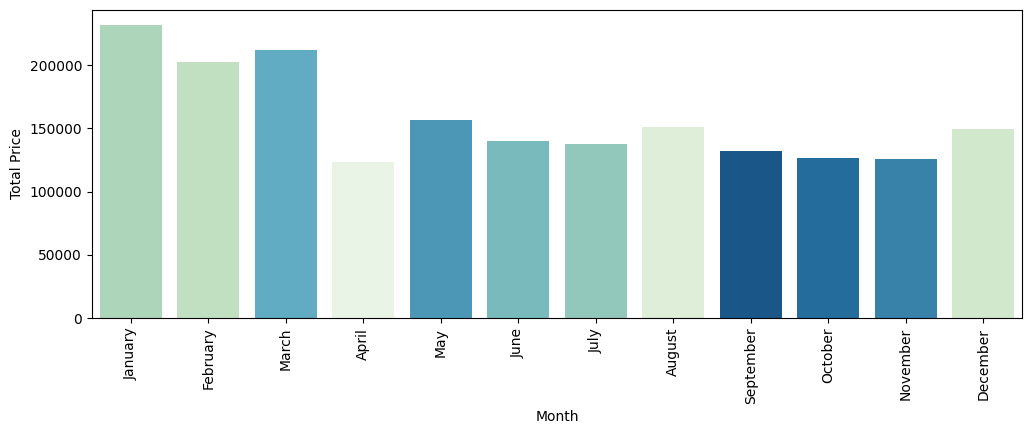

In [38]:
plt.figure(figsize = (12,4))
sns.barplot(x = gb.index, y = gb["Total Price"],order = ["January","February","March","April","May","June","July","August","September","October","November","December"],hue=gb.index,palette="GnBu")
plt.xticks(rotation = 90)

plt.show()

In [54]:
df = pd.merge(left = orders,right=products,on="Product ID",how = "inner")
df
#df is variable here

,Order ID_x,Customer ID_x,Product ID,Date_x,Original Price_x,Discount%_x,Month,Total Price,Order ID_y,Customer ID_y,Date_y,Original Price_y,Discount%_y
0,OD0001,C001,P0001,2021-05-20,349,0.3,May,244.3,OD0001,C001,2021-05-20,349,0.30
1,OD0001,C001,P0001,2021-05-20,349,0.3,May,244.3,OD0002,C002,2021-01-19,350,0.30
2,OD0001,C001,P0001,2021-05-20,349,0.3,May,244.3,OD0003,C003,2021-10-28,351,0.30
3,OD0001,C001,P0001,2021-05-20,349,0.3,May,244.3,OD0004,C004,2021-05-20,352,0.25
4,OD0001,C001,P0001,2021-05-20,349,0.3,May,244.3,OD0005,C005,2022-11-08,353,0.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6225,OD3500,C085,P3071,2023-03-15,1404,0.5,March,702.0,OD3496,C081,2023-01-01,685,0.50
6226,OD3500,C085,P3071,2023-03-15,1404,0.5,March,702.0,OD3497,C082,2022-07-08,707,0.50
6227,OD3500,C085,P3071,2023-03-15,1404,0.5,March,702.0,OD3498,C083,2021-02-06,1819,0.50
6228,OD3500,C085,P3071,2023-03-15,1404,0.5,March,702.0,OD3499,C084,2021-07-18,856,0.50


In [55]:
gb1 = df.groupby("Discount%_y").agg({"Total Price":"sum"})
gb1

,Total Price
Discount%_y,
0.10,21516.91
0.12,38340.00
0.14,23108.50
0.15,203355.32
0.21,36853.18
0.22,31300.62
0.23,8135.82
0.25,157276.03
0.30,780288.40


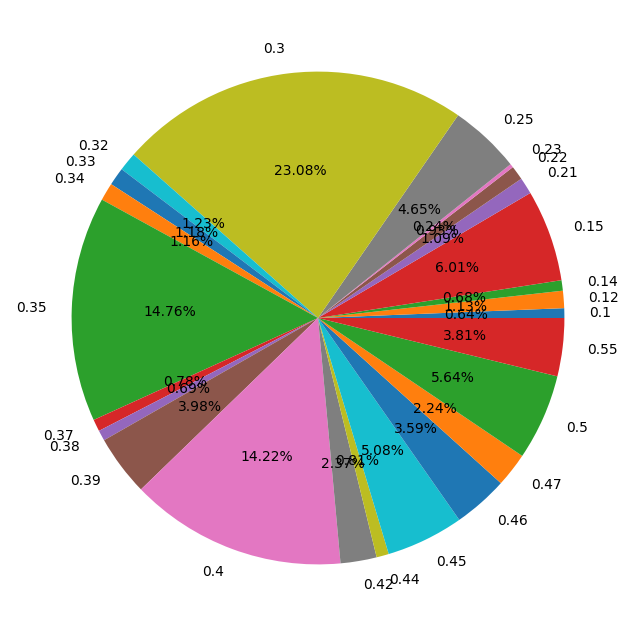

In [62]:
plt.figure(figsize = (20,8))
plt.pie(gb1["Total Price"],labels = gb1.index,autopct ="%1.2f%%")
plt.show()